# Buisness Problem


# Data Understanding

# Data Preperation

In [124]:
import pandas as pd
import numpy as np
import json

import matplotlib.pyplot as plt
import seaborn as sns

import gzip
from nltk import word_tokenize

from nltk.sentiment import SentimentIntensityAnalyzer

import re
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])


from sklearn.feature_extraction.text import CountVectorizer

import gensim
import gensim.corpora as corpora

from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases, Phraser

from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim_models

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { max-width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.output_area { max-width:100% !important; }</style>"))
display(HTML("<style>.input_area { max-width:100% !important; }</style>"))

## Subsetting data

## Initial Pre-processing

# Data Exploration

## EDA

In [3]:
df = pd.read_csv('data/product_reviews.csv')

C:\Users\PC\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (13,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,...,feature,rank,also_view,main_cat,similar_item,date,price,imageURL,imageURLHighRes,details
0,4.0,NaN,False,"07 12, 2000",A2L7WYA5OENV03,B00001P4ZH,{'Color:': ' Black/Silver'},Reticuli,"Get the SportaPros instead. They look better,...",Get the SportaPros Instead.,...,"['Designed for deep bass performance', 'Comfor...","['>#10,447 in Cell Phones &amp; Accessories (S...",[],Home Audio &amp; Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 14, 2003",$2.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
1,4.0,NaN,False,"07 12, 2000",A2L7WYA5OENV03,B00001P4ZH,{'Color:': ' Black/Silver'},Reticuli,"Get the SportaPros instead. They look better,...",Get the SportaPros Instead.,...,"['Designed for deep bass performance', 'Comfor...","['>#10,447 in Cell Phones &amp; Accessories (S...",[],Home Audio &amp; Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 14, 2003",$2.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
2,5.0,NaN,False,"04 26, 2018",A12XRTLO5VBCLP,B00001P4ZH,{'Color:': ' Black/Silver'},AntonyB,I've been looking for a lighter alternative to...,Perfect,...,"['Designed for deep bass performance', 'Comfor...","['>#10,447 in Cell Phones &amp; Accessories (S...",[],Home Audio &amp; Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 14, 2003",$2.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
3,5.0,NaN,False,"04 26, 2018",A12XRTLO5VBCLP,B00001P4ZH,{'Color:': ' Black/Silver'},AntonyB,I've been looking for a lighter alternative to...,Perfect,...,"['Designed for deep bass performance', 'Comfor...","['>#10,447 in Cell Phones &amp; Accessories (S...",[],Home Audio &amp; Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 14, 2003",$2.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}
4,5.0,NaN,False,"04 22, 2018",A9C8UK5307EAG,B00001P4ZH,{'Color:': ' Black/Silver'},Harry Mudd,The finest headphones available. You can spend...,"You will just love portapro, we all do.",...,"['Designed for deep bass performance', 'Comfor...","['>#10,447 in Cell Phones &amp; Accessories (S...",[],Home Audio &amp; Theater,"class=""a-bordered a-horizontal-stripes a-spa...","May 14, 2003",$2.00,['https://images-na.ssl-images-amazon.com/imag...,['https://images-na.ssl-images-amazon.com/imag...,{}


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132549 entries, 0 to 132548
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          132549 non-null  float64
 1   vote             12074 non-null   object 
 2   verified         132549 non-null  bool   
 3   reviewTime       132549 non-null  object 
 4   reviewerID       132549 non-null  object 
 5   asin             132549 non-null  object 
 6   style            103530 non-null  object 
 7   reviewerName     132529 non-null  object 
 8   reviewText       132540 non-null  object 
 9   summary          132528 non-null  object 
 10  unixReviewTime   132549 non-null  int64  
 11  image            1281 non-null    object 
 12  category         132549 non-null  object 
 13  tech1            6615 non-null    object 
 14  description      132549 non-null  object 
 15  fit              0 non-null       float64
 16  title            132549 non-null  obje

In [172]:
df.astype(str).duplicated().sum()

0

In [9]:
df = df.loc[df.astype(str).drop_duplicates().index]

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108851 entries, 0 to 108850
Data columns (total 30 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   overall          108851 non-null  float64
 1   vote             9083 non-null    object 
 2   verified         108851 non-null  bool   
 3   reviewTime       108851 non-null  object 
 4   reviewerID       108851 non-null  object 
 5   asin             108851 non-null  object 
 6   style            87170 non-null   object 
 7   reviewerName     108836 non-null  object 
 8   reviewText       108851 non-null  object 
 9   summary          108831 non-null  object 
 10  unixReviewTime   108851 non-null  int64  
 11  image            1115 non-null    object 
 12  category         108851 non-null  object 
 13  tech1            6612 non-null    object 
 14  description      108851 non-null  object 
 15  fit              0 non-null       float64
 16  title            108851 non-null  obje

In [20]:
df.isna().sum()

overall                 0
vote                99776
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               21682
reviewerName           15
reviewText              8
summary                20
unixReviewTime          0
image              107743
category                0
tech1              102247
description             0
fit                108859
title                   0
also_buy                0
tech2              108198
brand                   0
feature                 0
rank                    0
also_view               0
main_cat                0
similar_item        11906
date                31627
price               31454
imageURL                0
imageURLHighRes         0
details                 0
dtype: int64

In [23]:
df.dropna(subset = ['reviewText'], inplace = True)

In [24]:
df.isna().sum()

overall                 0
vote                99768
verified                0
reviewTime              0
reviewerID              0
asin                    0
style               21681
reviewerName           15
reviewText              0
summary                20
unixReviewTime          0
image              107736
category                0
tech1              102239
description             0
fit                108851
title                   0
also_buy                0
tech2              108190
brand                   0
feature                 0
rank                    0
also_view               0
main_cat                0
similar_item        11905
date                31624
price               31452
imageURL                0
imageURLHighRes         0
details                 0
dtype: int64

In [25]:
df = df.reset_index(drop = True)

In [27]:
df.overall.value_counts(normalize = True)

5.0    0.599820
4.0    0.194045
3.0    0.090996
1.0    0.059246
2.0    0.055893
Name: overall, dtype: float64

In [28]:
df.title.value_counts()

sony mdrzx100 headphones (black)                                                                                                                                                                   3119
sony mdrzx100 zx series stereo headphones (blue)                                                                                                                                                   3106
toysdone wireless headphones stereo earbuds wireless sport earphones for running with mic (6 hours play time, ipx4 sweatproof, secure ear hooks design)-black/green                                2559
xbrn dual ports adapter splitter, 2 in 1 headphone jack aux audio &amp; charger adapter cable connector compactible for ip7/ 7 plus/ 8/plus/x (support calling + sync + music control + charge)    2497
inassen compatible earphone adapter headphone                                                                                                                                                      2243


In [29]:
df.asin.value_counts().count()

129

In [30]:
df.brand.value_counts().count()

69

In [31]:
df.verified.value_counts(normalize = True)

True     0.889996
False    0.110004
Name: verified, dtype: float64

In [ ]:
ax = df.overall.value_counts().sort_index().plot(kind = 'bar',
                                            title = 'Count by Review Star',
                                            figsize = (10,5))
ax.set_xlabel('Review Stars');


In [ ]:
df.verified.value_counts()

In [ ]:
sns.barplot(data = df, x = 'verified', y = 'overall')

In [ ]:
df.brand.value_counts()

In [ ]:
dfg = df.groupby('brand')['overall'].mean().sort_values(ascending = False)

In [ ]:
fig, ax = plt.subplots(figsize = (10,30))
ax = sns.barplot(x = dfg.values, y = dfg.index, orient = 'h')

## Sentiment Validation of Star Ratings

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
df.reviewText[0]

In [ ]:
df.overall[0]

In [ ]:
sia.polarity_scores(df.reviewText[0])

In [ ]:
sent_val_df = df.copy()

In [ ]:
sent_val_df['compound'] = [sia.polarity_scores(str(x))['compound'] for x in df['reviewText']]
sent_val_df['neg'] = [sia.polarity_scores(str(x))['neg'] for x in df['reviewText']]
sent_val_df['neu'] = [sia.polarity_scores(str(x))['neu'] for x in df['reviewText']]
sent_val_df['pos'] = [sia.polarity_scores(str(x))['pos'] for x in df['reviewText']]

In [ ]:
sent_val_df.head()

In [ ]:
ax = sns.barplot(data = sent_val_df, x = 'overall', y = 'compound')

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.barplot(data = sent_val_df, x = 'overall', y = 'pos', ax = axs[0])
sns.barplot(data = sent_val_df, x = 'overall', y = 'neu', ax = axs[1])
sns.barplot(data = sent_val_df, x = 'overall', y = 'neg', ax = axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative');

In [33]:
def label_encode(x):
    if x <= 3:
        return 0
    if x > 3:
        return 1

In [34]:
df["sentiment"] = df["overall"].apply(lambda x: label_encode(x))

In [35]:
df['sentiment'].value_counts(normalize = True)

1    0.793865
0    0.206135
Name: sentiment, dtype: float64

## Text Exploration

In [176]:
df.reviewText[5687]

"Many years ago, I had some Koss pro grade headphones (back in the days of vinyl LPs) that sounded great, but were very heavy (they built them solidly in those days) and become uncomfortable after a while.  I pretty much quit listening to music with headphones in later years.  However, there are still times when I have an urge to really LISTEN to the music, and a good pair of headphones is essential.\n\nI picked up a similarly priced pair of JVC  HA-G101 headphones at a local discount store a while back, based upon my experience with JVC products over the years.  And, it was the only 'name' brand at that particular store.  I quickly determined that while they sounded okay, and were comfortable to wear for long periods, they were not impressive, with a somewhat 'muddy' sound, weak bass and less than impressive high ends.  I was disappointed, but for less than $20, not a big deal.\n\nDeciding that I wanted to try another pair, and recalling the quality sound from my old Koss headphones, 

In [177]:
df.summary[5687]

'Unbeatable sound and comfort for the price.'

In [179]:
df.reviewText[5687] + " " + df.summary[5687]

"Many years ago, I had some Koss pro grade headphones (back in the days of vinyl LPs) that sounded great, but were very heavy (they built them solidly in those days) and become uncomfortable after a while.  I pretty much quit listening to music with headphones in later years.  However, there are still times when I have an urge to really LISTEN to the music, and a good pair of headphones is essential.\n\nI picked up a similarly priced pair of JVC  HA-G101 headphones at a local discount store a while back, based upon my experience with JVC products over the years.  And, it was the only 'name' brand at that particular store.  I quickly determined that while they sounded okay, and were comfortable to wear for long periods, they were not impressive, with a somewhat 'muddy' sound, weak bass and less than impressive high ends.  I was disappointed, but for less than $20, not a big deal.\n\nDeciding that I wanted to try another pair, and recalling the quality sound from my old Koss headphones, 

In [188]:
df['reviews'] = df.reviewText + ' ' + df.summary.astype(str)

In [191]:
text_stats_df = df[['reviews', 'sentiment']].copy()

In [192]:
text_stats_df.head()

,reviews,sentiment
0,"Get the SportaPros instead. They look better,...",1
1,I've been looking for a lighter alternative to...,1
2,The finest headphones available. You can spend...,1
3,3rd pair of these I've purchased. My wife has...,1
4,My old Koss Porta Pros finally got beat to dea...,1


In [38]:
def word_count(text):
    return len(word_tokenize(text))

def char_count(text):
    text_without_spaces = text.replace(" ", "")
    return len(text_without_spaces)

In [193]:
text_stats_df['word_count'] = df.reviewText.apply(lambda x: word_count(x))
text_stats_df['review_len'] = df.reviewText.apply(lambda x: char_count(x))

In [40]:
text_stats_df.head()

,reviewText,sentiment,word_count,review_len
0,"Get the SportaPros instead. They look better,...",1,26,103
1,I've been looking for a lighter alternative to...,1,262,1090
2,The finest headphones available. You can spend...,1,109,480
3,3rd pair of these I've purchased. My wife has...,1,104,392
4,My old Koss Porta Pros finally got beat to dea...,1,163,683


In [ ]:
text_stats_df.groupby('sentiment')['word_count'].mean().plot(kind = 'bar', figsize = (15,15));

In [ ]:
text_stats_df.groupby('sentiment')['review_len'].mean().plot(kind = 'bar', figsize = (15,15));

In [ ]:
correlation = text_stats_df[['sentiment', 'word_count', 'review_len']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(50,30))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask);

In [194]:
text_stats_df.describe()

,sentiment,word_count,review_len
count,108851.000000,108851.000000,108851.000000
mean,0.793865,83.697724,325.504019
std,0.404530,125.798946,497.517006
min,0.000000,1.000000,1.000000
25%,1.000000,19.000000,72.000000
50%,1.000000,44.000000,169.000000
75%,1.000000,99.000000,383.000000
max,1.000000,3864.000000,15592.000000


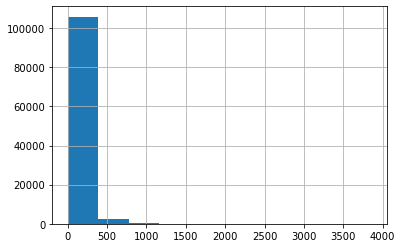

In [196]:
text_stats_df.word_count.hist();

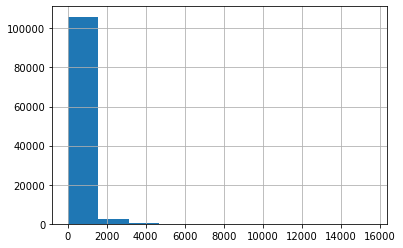

In [195]:
text_stats_df.review_len.hist();

In [46]:
text_stats_df.sort_values(by = 'word_count', ascending = False).head(20)

,reviewText,sentiment,word_count,review_len
101837,"<div id=""video-block-R21WD3K0GDQSEG"" class=""a-...",1,3864,14970
62219,"Taking the Bose MIE2i, the most comfortable an...",1,3711,15592
99927,"Item arrived on time, well-packaged. Contained...",1,3243,12535
96857,I bought these headphones and they were my fir...,1,2973,13101
108741,Recently I went on search for noise cancellin...,1,2788,11176
69271,Compared the Audio Technica ANC7B's vs. Bose Q...,0,2771,10619
96841,The V-Moda Crossfade LP over-the-ear headphone...,1,2739,11080
13007,"Oh, one of the most beloved and well known hea...",1,2377,9216
27101,"*UPDATE*\nAs promised, I wanted to come back a...",1,2260,8963
102878,Having now had experience with an extremely di...,1,2260,10162


In [ ]:
text_stats_df.sort_values(by = 'word_count', ascending = False).tail(20)

In [51]:
def clean_text(text):
    # Replace &nbsp; with regular space
    text = text.replace("&nbsp;", " ")
    # Remove HTML tags and attributes
    text = re.sub(r"<[^>]+>", "", text)
    # Remove URLs
    text = re.sub(r"http\S+", "", text)
    # Remove line breaks and extra whitespace
    text = re.sub(r"\s+", " ", text)
    # Remove numbers and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase and remove leading/trailing white space
    # Tokenize and lemmatize
    doc = nlp(text)
    lemmas = [token.lemma_.lower().strip() for token in doc if not token.is_punct and len(token) > 2]

    return lemmas

In [224]:
text_stats_df.reviews[101837]

'<div id="video-block-R21WD3K0GDQSEG" class="a-section a-spacing-small a-spacing-top-mini video-block"></div><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/C1oPr87IlBS.mp4" class="video-url"><input type="hidden" name="" value="https://images-na.ssl-images-amazon.com/images/I/81j8xFjPmAS.png" class="video-slate-img-url">&nbsp;&nbsp;&nbsp;NOTE on the Video:\n\nI apologize for quality but I am only trying to illustrate a couple of things:\n\n- Voice search is super efficient: rather than push something cute your way, Roku figures out what you just said and the recognition rate was close to 100% and then immediately shows you what\'s available and for how much if not free.\n- Search results are neutral: Fire TV claims that they can\'t \'see\' inside Netflix yet Roku has no problem whatsoever finding the \'free\' movie there while showing many other sources.\n- Jumping from the search result to a service (Netflix here) is super-quick, no time wasted.\n-

In [226]:
clean_text(text_stats_df.reviews[101837])

['note',
 'the',
 'video',
 'apologize',
 'for',
 'quality',
 'but',
 'only',
 'try',
 'illustrate',
 'couple',
 'thing',
 'voice',
 'search',
 'super',
 'efficient',
 'rather',
 'than',
 'push',
 'something',
 'cute',
 'your',
 'way',
 'roku',
 'figure',
 'out',
 'what',
 'you',
 'just',
 'say',
 'and',
 'the',
 'recognition',
 'rate',
 'be',
 'close',
 'and',
 'then',
 'immediately',
 'show',
 'you',
 'what',
 'available',
 'and',
 'for',
 'how',
 'much',
 'not',
 'free',
 'search',
 'result',
 'be',
 'neutral',
 'fire',
 'claim',
 'that',
 'they',
 'see',
 'inside',
 'netflix',
 'yet',
 'roku',
 'have',
 'problem',
 'whatsoever',
 'find',
 'the',
 'free',
 'movie',
 'there',
 'while',
 'show',
 'many',
 'other',
 'source',
 'jump',
 'from',
 'the',
 'search',
 'result',
 'service',
 'netflix',
 'here',
 'superquick',
 'time',
 'waste',
 'the',
 'roku',
 'media',
 'player',
 'require',
 'zero',
 'setup',
 'before',
 'see',
 'nas',
 'and',
 'routerattached',
 'hdd',
 'discover',
 'ove

In [197]:
text_stats_df['cleaned_text'] = text_stats_df.reviews.apply(lambda x: clean_text(x))

In [ ]:
text_stats_df.head()

In [54]:
def word_count_tokened(text):
    return len(text)

def char_count_tokened(text):
    chars = sum(len(token) for token in text)
    return chars

In [198]:
text_stats_df['cleaned_word_count'] = text_stats_df.cleaned_text.apply(lambda x: word_count_tokened(x))
text_stats_df['cleaned_review_len'] = text_stats_df.cleaned_text.apply(lambda x: char_count_tokened(x))

In [57]:
text_stats_df.describe()

,sentiment,word_count,review_len,cleaned_word_count,cleaned_review_len
count,108851.000000,108851.000000,108851.000000,108851.000000,108851.000000
mean,0.793865,83.697724,325.504019,56.230903,265.370451
std,0.404530,125.798946,497.517006,83.635482,401.289318
min,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.000000,19.000000,72.000000,13.000000,60.000000
50%,1.000000,44.000000,169.000000,30.000000,139.000000
75%,1.000000,99.000000,383.000000,67.000000,313.000000
max,1.000000,3864.000000,15592.000000,2625.000000,12800.000000


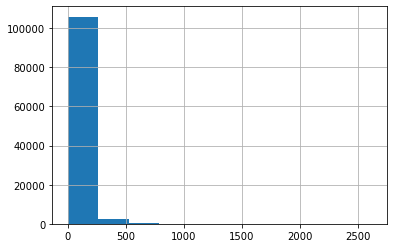

In [58]:
text_stats_df.cleaned_word_count.hist();

In [135]:
text_stats_df[text_stats_df.cleaned_word_count > 3]

,reviewText,sentiment,word_count,review_len,cleaned_text,cleaned_word_count,cleaned_review_len
0,"Get the SportaPros instead. They look better,...",1,26,103,"[get, the, sportapros, instead, they, look, we...",18,91
1,I've been looking for a lighter alternative to...,1,262,1090,"[be, look, for, light, alternative, absolutely...",180,895
2,The finest headphones available. You can spend...,1,109,480,"[the, fine, headphone, available, you, can, sp...",80,412
3,3rd pair of these I've purchased. My wife has...,1,104,392,"[pair, these, purchase, wife, have, pair, and,...",69,314
4,My old Koss Porta Pros finally got beat to dea...,1,163,683,"[old, koss, porta, pros, finally, get, beat, d...",120,573
...,...,...,...,...,...,...,...
108846,Having owned Bose noise cancelling products fr...,1,86,362,"[have, own, bose, noise, cancel, product, from...",57,291
108847,"These headphones are great - lightweight, easy...",0,109,436,"[these, headphone, be, great, lightweight, eas...",74,361
108848,Love these ... really nice upgrade on the QC15...,1,47,195,"[love, these, really, nice, upgrade, the, love...",34,165
108849,These headphones are terrific but Bose custome...,0,74,280,"[these, headphone, be, terrific, but, bose, cu...",56,244


In [239]:
data_df = text_stats_df[(text_stats_df.cleaned_word_count > 3)].copy()

In [242]:
data_df = data_df.reset_index(drop = True)

In [243]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105829 entries, 0 to 105828
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   reviews             105829 non-null  object
 1   sentiment           105829 non-null  int64 
 2   word_count          105829 non-null  int64 
 3   review_len          105829 non-null  int64 
 4   cleaned_text        105829 non-null  object
 5   cleaned_word_count  105829 non-null  int64 
 6   cleaned_review_len  105829 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 5.7+ MB


In [240]:
data_df.describe()

,sentiment,word_count,review_len,cleaned_word_count,cleaned_review_len
count,105829.000000,105829.000000,105829.000000,105829.000000,105829.000000
mean,0.790454,86.039290,334.608916,62.094653,293.863185
std,0.406986,126.805936,501.602482,85.012100,408.739788
min,0.000000,1.000000,1.000000,4.000000,12.000000
25%,1.000000,21.000000,80.000000,17.000000,82.000000
50%,1.000000,46.000000,176.000000,36.000000,168.000000
75%,1.000000,102.000000,393.000000,74.000000,347.000000
max,1.000000,3864.000000,15592.000000,2629.000000,12818.000000


In [145]:
stop_words = nlp.Defaults.stop_words

In [147]:
len(stop_words)

335

In [69]:
def count_stop_words(text):

    # Count the number of stop words in the text using set intersection
    stop_word_count = len(set(text).intersection(stop_words))

    return stop_word_count

In [200]:
data_df['cleaned_sw_count'] = data_df.cleaned_text.apply(lambda x: count_stop_words(x))

In [201]:
data_df.describe()

,sentiment,word_count,review_len,cleaned_word_count,cleaned_review_len,cleaned_sw_count
count,105829.000000,105829.000000,105829.000000,105829.000000,105829.000000,105829.000000
mean,0.790454,86.039290,334.608916,62.094653,293.863185,18.446409
std,0.406986,126.805936,501.602482,85.012100,408.739788,15.218886
min,0.000000,1.000000,1.000000,4.000000,12.000000,0.000000
25%,1.000000,21.000000,80.000000,17.000000,82.000000,7.000000
50%,1.000000,46.000000,176.000000,36.000000,168.000000,14.000000
75%,1.000000,102.000000,393.000000,74.000000,347.000000,25.000000
max,1.000000,3864.000000,15592.000000,2629.000000,12818.000000,142.000000


In [72]:
def preprocess(tokens):
    # remove stop words
    filtered_tokens = [token for token in tokens if not token in stop_words]
    return filtered_tokens

In [202]:
data_df['processed_text'] = data_df['cleaned_text'].apply(lambda x: preprocess(x))

In [74]:
def dummy(doc):
    return doc

In [203]:
def top_words(text, n = None, ngram = (1,1)):
    cv = CountVectorizer(ngram_range = ngram, stop_words = None, tokenizer = dummy, preprocessor = dummy)
    words = cv.fit_transform(text)
    sum_words = words.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    word_df = pd.DataFrame(word_freq, columns=['word', 'count'])
    return word_df[:n]

In [204]:
top30 = top_words(text = data_df.cleaned_text, n = 30)
top30_sw = top_words(text = data_df.processed_text, n = 30)

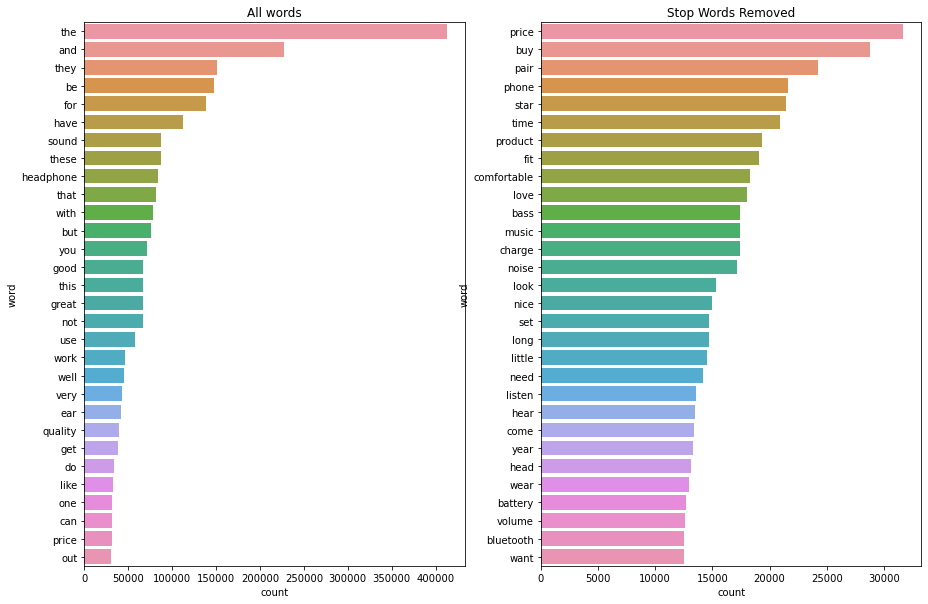

In [205]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_sw, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('All words')
axs[1].set_title('Stop Words Removed');

In [206]:
top30_pos = top_words(text = data_df[data_df.sentiment == 1].processed_text, n = 30)
top30_neg = top_words(text = data_df[data_df.sentiment == 0].processed_text, n = 30)

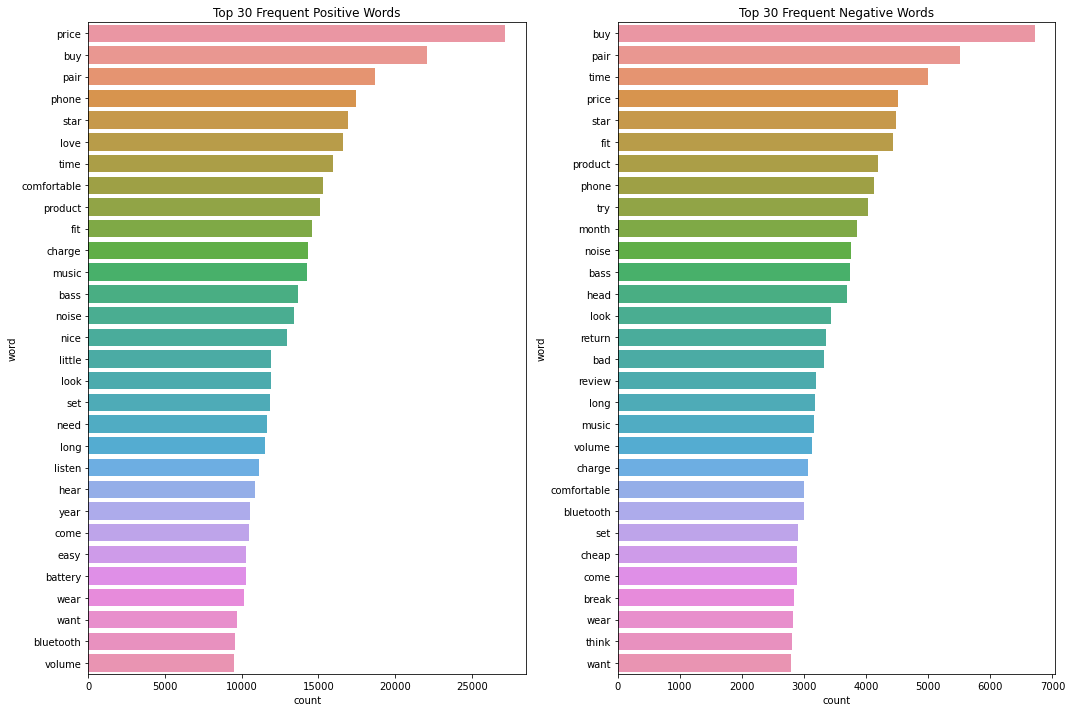

In [207]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30_pos, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_neg, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('Top 30 Frequent Positive Words')
axs[1].set_title('Top 30 Frequent Negative Words')
fig.tight_layout();

In [ ]:
['sound', 'headphone', 'use', 'work', 'ear', 'good', 'great', 'work', 'like', 'quality']

In [208]:
top30_bigrams = top_words(text = data_df.cleaned_text, n = 30, ngram = (2,2))
top30_bigrams_sw = top_words(text = data_df.processed_text, n = 30, ngram = (2,2))

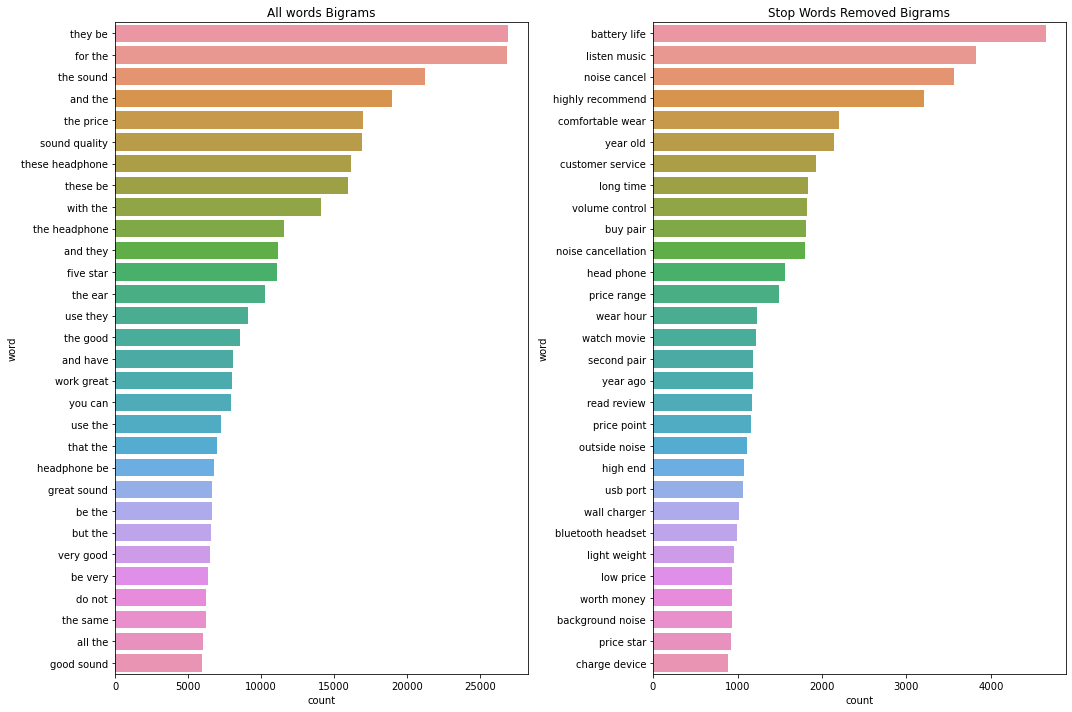

In [209]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30_bigrams, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_bigrams_sw, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('All words Bigrams')
axs[1].set_title('Stop Words Removed Bigrams')
fig.tight_layout();

In [210]:
top30_pos_bigrams = top_words(text = data_df[data_df.sentiment == 1].processed_text, 
                              n = 30, 
                              ngram = (2,2))
top30_neg_bigrams = top_words(text = data_df[data_df.sentiment == 0].processed_text, 
                              n = 30, 
                              ngram = (2,2))

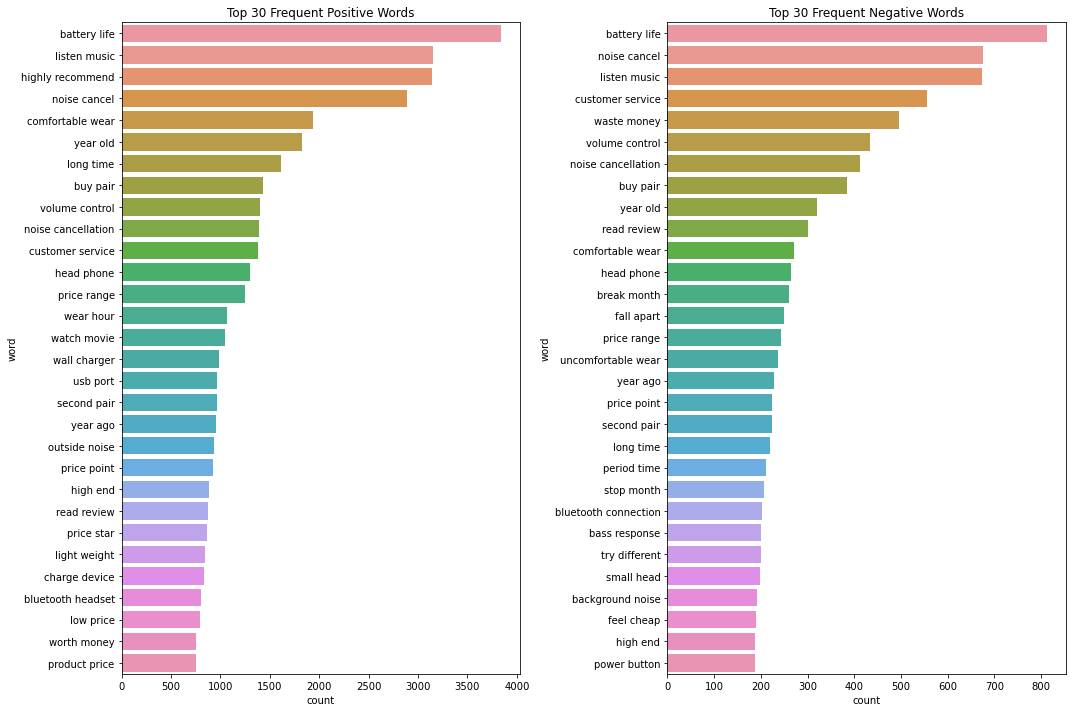

In [211]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30_pos_bigrams, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_neg_bigrams, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('Top 30 Frequent Positive Words')
axs[1].set_title('Top 30 Frequent Negative Words')
fig.tight_layout();

In [212]:
top30_trigrams = top_words(text = data_df.cleaned_text, n = 30, ngram = (3,3))
top30_trigrams_sw = top_words(text = data_df.processed_text, n = 30, ngram = (3,3))

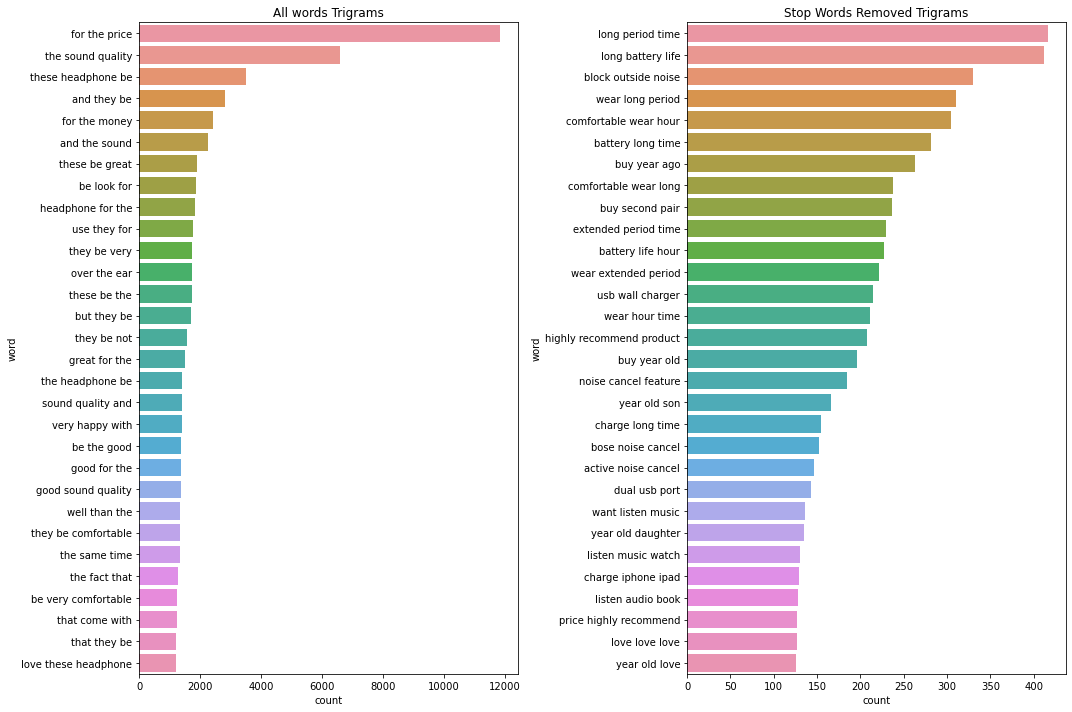

In [213]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30_trigrams, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_trigrams_sw, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('All words Trigrams')
axs[1].set_title('Stop Words Removed Trigrams')
fig.tight_layout();

In [214]:
top30_pos_trigrams = top_words(text = data_df[data_df.sentiment == 1].processed_text, 
                              n = 30, 
                              ngram = (3,3))
top30_neg_trigrams = top_words(text = data_df[data_df.sentiment == 0].processed_text, 
                              n = 30, 
                              ngram = (3,3))

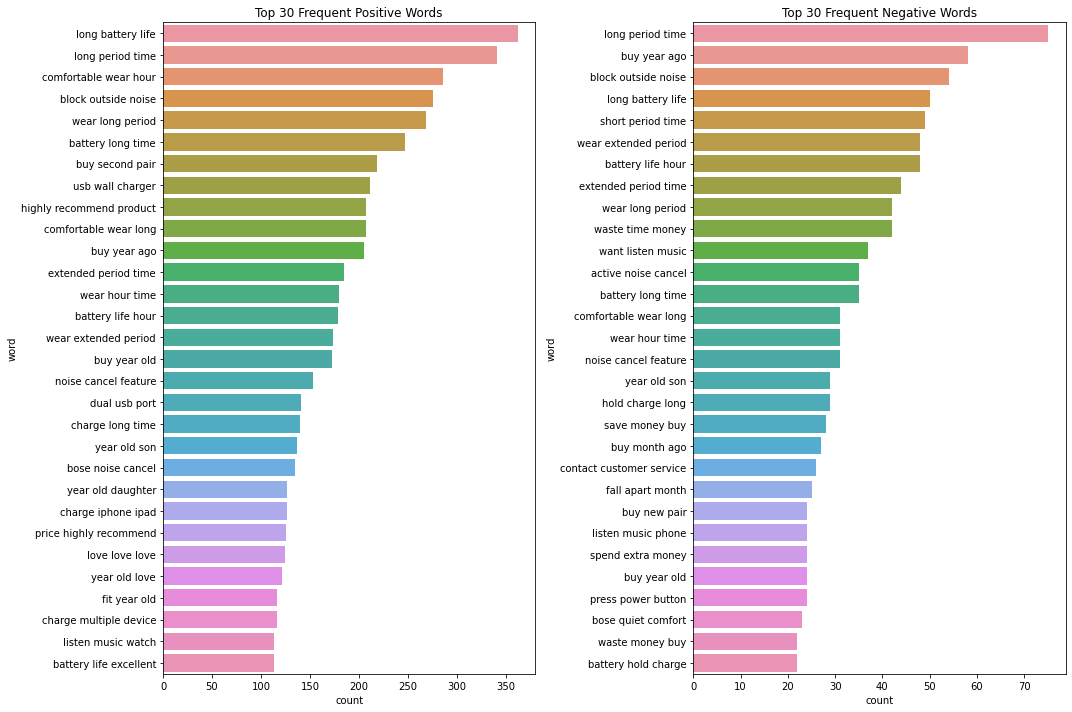

In [215]:
fig, axs = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data = top30_pos_trigrams, x = 'count', y = 'word', orient = 'h', ax = axs[0])
sns.barplot(data = top30_neg_trigrams, x = 'count', y = 'word', orient = 'h', ax = axs[1])
axs[0].set_title('Top 30 Frequent Positive Words')
axs[1].set_title('Top 30 Frequent Negative Words')
fig.tight_layout();

In [42]:
{'sound', 'headphone', 'use', 'work', 'ear', 'good', 'great', 'work', 'like', 'quality'}

In [107]:
len(stop_words)

326

In [155]:
stop_words |= {'sound', 'headphone', 'use', 'work', 'ear', 'good', 'great', 'work', 'like', 'quality'}

In [149]:
len(stop_words)

326

In [156]:
data_df.processed_text = data_df.processed_text.apply(lambda x: preprocess(x))

In [234]:
processed_df = data_df[['reviews', 'cleaned_text', 'sentiment']].copy()

In [235]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105829 entries, 0 to 108850
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   reviews       105829 non-null  object
 1   cleaned_text  105829 non-null  object
 2   sentiment     105829 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 3.2+ MB


In [245]:
processed_df.to_csv('data/processed_reviews.csv', index = False)

In [216]:
data_words = data_df.processed_text

In [114]:
data_words

0         [sportapros, instead, look, wear, street, conf...
1         [look, light, alternative, absolutely, perfect...
2         [fine, available, spend, vast, money, status, ...
3         [pair, purchase, wife, pair, pair, glove, box,...
4         [old, koss, porta, pros, finally, beat, death,...
                                ...                        
108846    [bose, noise, cancel, product, sennheiser, hea...
108847    [lightweight, easy, connect, superb, long, bat...
108848    [love, nice, upgrade, love, bluetooth, fantast...
108849    [terrific, bose, customer, service, bad, tragi...
108850    [couple, day, music, skip, cut, bluetooth, dro...
Name: processed_text, Length: 108528, dtype: object

In [217]:
# Create bigrams
bigram = Phrases(data_words, min_count=5, threshold=10)
bigram_phraser = Phraser(bigram)
bigram_docs = [bigram_phraser[doc] for doc in data_words]

# Create trigrams
trigram = Phrases(bigram_docs, min_count=5, threshold=10)
trigram_phraser = Phraser(trigram)
trigram_docs = [trigram_phraser[doc] for doc in bigram_docs]


In [218]:
id2word = corpora.Dictionary(trigram_docs)

# Create Corpus
texts = trigram_docs

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 2), (6, 1), (7, 1)]]


In [219]:
lda_model = LdaMulticore(corpus=corpus,
                         id2word=id2word,
                         num_topics=5, 
                         random_state=100,
                         workers = 4,
                         chunksize=100,
                         passes=10,
                         alpha='symmetric')

In [220]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.019609  0.026543       1        1  27.322787
3     -0.019668 -0.159383       2        1  24.610094
2     -0.068535 -0.142387       3        1  20.827427
1     -0.190361  0.193309       4        1  15.298443
4      0.298173  0.081918       5        1  11.941249, topic_info=        Term          Freq         Total Category  logprob  loglift
198     star  20922.000000  20922.000000  Default  30.0000  30.0000
94      love  18257.000000  18257.000000  Default  29.0000  29.0000
162    price  23623.000000  23623.000000  Default  28.0000  28.0000
16       buy  25580.000000  25580.000000  Default  27.0000  27.0000
11202   roku  13213.000000  13213.000000  Default  26.0000  26.0000
...      ...           ...           ...      ...      ...      ...
399      set   2953.474483  13400.877580   Topic5  -4.6876   0.6128
26      easy   2305.013633  10053.619706   Topic5  -4.9355   0.6523
264    break   1944.791590   6108.716551   Topic5  -5.1054   0.9806
145      fit   2127.790421  18028.492152   Topic5  -5.0155  -0.0117
170     time   1734.360625  18846.609005   Topic5  -5.2199  -0.2605

[373 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
1586      3  0.126133    absolutely_love
1586      5  0.872417    absolutely_love
3905      4  0.999330             access
1945      1  0.146207            adapter
1945      4  0.853128            adapter
...     ...       ...                ...
75        3  0.313666               year
75        5  0.384494               year
1761      5  0.999799           year_old
9343      5  0.991893  year_old_daughter
5639      5  0.994503       year_old_son

[646 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 3, 2, 5])

In [221]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMulticore(corpus=corpus, 
                             num_topics=num_topics, 
                             id2word=id2word, 
                             passes = 10,
                             random_state = 100,
                             workers = 4,
                             chunksize = 100,
                             alpha = 'symmetric')
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [222]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word,
                                                        corpus=corpus, 
                                                        texts=trigram_docs, 
                                                        start=2, limit=26, step=3)

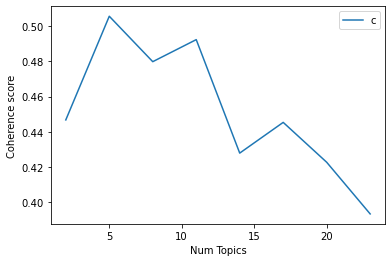

In [223]:
# Show graph
limit=26; start=2; step=3;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [161]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.4687
Num Topics = 5  has Coherence Value of 0.5212
Num Topics = 8  has Coherence Value of 0.4554
Num Topics = 11  has Coherence Value of 0.5136
Num Topics = 14  has Coherence Value of 0.4653
Num Topics = 17  has Coherence Value of 0.4515
Num Topics = 20  has Coherence Value of 0.4137
Num Topics = 23  has Coherence Value of 0.4333


In [64]:
optimal_model = model_list[1]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

[(0, '0.026*"picture" + 0.024*"camera" + 0.015*"lens" + 0.014*"use" + 0.013*"love" + 0.012*"great" + 0.012*"image" + 0.012*"light" + 0.011*"photo" + 0.011*"quality"'), (1, '0.023*"work" + 0.021*"buy" + 0.014*"get" + 0.013*"time" + 0.012*"try" + 0.012*"review" + 0.012*"product" + 0.011*"go" + 0.011*"day" + 0.011*"send"'), (2, '0.058*"camera" + 0.016*"work" + 0.014*"app" + 0.014*"system" + 0.014*"set" + 0.012*"easy" + 0.012*"video" + 0.011*"use" + 0.010*"setup" + 0.010*"phone"'), (3, '0.143*"great" + 0.094*"work" + 0.086*"good" + 0.063*"price" + 0.054*"product" + 0.048*"quality" + 0.022*"excellent" + 0.017*"buy" + 0.016*"easy" + 0.014*"nice"'), (4, '0.039*"camera" + 0.031*"fit" + 0.027*"case" + 0.020*"bag" + 0.019*"lens" + 0.017*"small" + 0.017*"love" + 0.017*"hold" + 0.016*"battery" + 0.014*"canon"')]


In [65]:
lda_model = model_list[1]

In [53]:
data_df = data_df.reset_index(drop = True)

In [165]:
data = data_df.reviews

In [166]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [227]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data)

In [228]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [229]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.7530,"fit, earbud, little, head, bud, comfortable, c...","Get the SportaPros instead. They look better,..."
1,1,0.0,0.5995,"fit, earbud, little, head, bud, comfortable, c...",I've been looking for a lighter alternative to...
2,2,3.0,0.6554,"bass, music, bose, hear, listen, high, loud, a...",The finest headphones available. You can spend...
3,3,2.0,0.3708,"bluetooth, headset, pair, time, charge, connec...",3rd pair of these I've purchased. My wife has...
4,4,0.0,0.5470,"fit, earbud, little, head, bud, comfortable, c...",My old Koss Porta Pros finally got beat to dea...
5,5,0.0,0.6517,"fit, earbud, little, head, bud, comfortable, c...",I'm not sure what it would take for these to e...
6,6,3.0,0.7169,"bass, music, bose, hear, listen, high, loud, a...","Excellent phones! Fidelity is superb, with an ..."
7,7,4.0,0.5386,"star, love, price, buy, product, pair, awesome...",I bought a pair of these about 7 years ago and...
8,8,3.0,0.7172,"bass, music, bose, hear, listen, high, loud, a...",Best Headphones for the Cost AND better then t...
9,9,3.0,0.7252,"bass, music, bose, hear, listen, high, loud, a...","I have a dozen headphones, quite of a few of t..."


In [230]:
df_dominant_topic.Dominant_Topic.value_counts()

4.0    27342
0.0    27297
2.0    18740
3.0    18543
1.0    13907
Name: Dominant_Topic, dtype: int64

In [171]:
df_dominant_topic.Keywords.value_counts()

buy, love, price, pair, product, comfortable, set, purchase, look, nice           30499
fit, earbud, head, run, phone, little, stay, small, bud, cord                     26555
bass, music, hear, bose, listen, high, loud, comfortable, price, noise_cancel     21174
charge, bluetooth, headset, device, phone, connect, time, roku, turn, wireless    17977
pair, product, try, review, return, battery, issue, update, time, buy             12323
Name: Keywords, dtype: int64

In [78]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,1.0,"feature, quality, good, great, frame, nice, re...",22341.0,0.1725
1.0,1.0,"feature, quality, good, great, frame, nice, re...",41072.0,0.3172
2.0,1.0,"feature, quality, good, great, frame, nice, re...",24790.0,0.1914
3.0,2.0,"phone, connect, like, time, buy, try, go, get,...",28707.0,0.2217
4.0,0.0,"work, great, good, product, quality, price, bu...",12587.0,0.0972
...,...,...,...,...
129492.0,3.0,"camera, app, set, easy, video, work, setup, us...",NaN,NaN
129493.0,0.0,"work, great, good, product, quality, price, bu...",NaN,NaN
129494.0,3.0,"camera, app, set, easy, video, work, setup, us...",NaN,NaN
129495.0,3.0,"camera, app, set, easy, video, work, setup, us...",NaN,NaN
